## Beschreibung des maschinellen  zur Spam-Klassifizierung

### Beschreibung:

Das vorliegende Skript ist ein Beispiel für ein maschinelles Lernprojekt, das darauf abzielt, Spam-Nachrichten von nicht-spamartigen Nachrichten zu unterscheiden. Es verwendet zwei Varianten des Naive Bayes-Klassifikators, nämlich GaussianNB und MultinomialNB, um die Nachrichten zu klassifizieren. Der Code evaluiert die Leistung dieser Modelle anhand verschiedener Metriken wie Genauigkeit, Kreuzvalidierung, Confusion Matrix und Klassifizierungsbericht.i
    ertes Modell für zukünftige Verwendungszwecke zu speichern und zu laden.
orbereitung und Modellierung.


1. **Datenimport und -vorbereitung:**
   - Importiere die erforderlichen Bibliotheken (Pandas, NumPy, Matplotlib) und lade die Daten aus einer CSV-Datei (`spam.csv`).
   - Ersetze die Kategorie 'ham' durch 'Nicht-Spam'.
   - Überprüfe die Daten auf das Vorhandensein fehlender Werte.

In [1]:
# Importiere die benötigten Bibliotheken
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Lese die Daten aus der CSV-Datei ein
daten = pd.read_csv("./spam.csv")

In [3]:
# Zeige die ersten Zeilen der Daten an
daten.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Ersetze 'ham' mit 'Nicht-Spam'
daten.loc[daten['type'] == 'ham', 'type'] = 'Nicht-Spam'

In [5]:
# Überprüfe die Länge der Daten
len(daten)

5572

In [6]:
# Überprüfe, ob fehlende Daten vorhanden sind
daten.isna().sum()

type       0
message    0
dtype: int64

2. **Vorbereitung der Daten für das Modell:**
   - Teile die Daten in Trainings- und Testsets auf.
   - Wandle die Textnachrichten mithilfe von `CountVectorizer` in numerische Matrizen um.


In [7]:
# Importiere die erforderlichen Funktionen und Klassen für die Datenverarbeitung
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Teile die Daten in Trainings- und Testsets auf
X = daten["message"]
y = daten["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Konvertiere die Textdaten in eine numerische Matrix
cv = CountVectorizer()
cv.fit(X_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

3. **Training und Evaluation des ersten Modells (GaussianNB):**
   - Trainiere ein Naive Bayes Modell (GaussianNB) mit den Trainingsdaten.
   - Bewerte die Leistung des Modells auf den Testdaten mithilfe von `model.score`.
   - Erstelle eine Confusion Matrix und eine Kreuztabelle für die Vorhersagen.

In [8]:
# Trainiere ein Naive Bayes Modell (GaussianNB)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
np.random.seed(42)
model.fit(X_train.toarray(), y_train)

# Evaluiere das Modell
model.score(X_test.toarray(), y_test)

0.9066762383345298

In [9]:
# Erstelle eine Confusion Matrix
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test.toarray())
confusion_matrix(y_test, y_preds)

# Berechne und zeige eine Kreuztabelle der Vorhersagen
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,Nicht-Spam,spam
Actual Labels,,
Nicht-Spam,1087,109
spam,21,176


4. **Training und Evaluation des zweiten Modells (MultinomialNB):**
   - Trainiere ein weiteres Naive Bayes Modell (MultinomialNB) mit den Trainingsdaten.
   - Führe eine Kreuzvalidierung durch und berechne den Durchschnitt der Ergebnisse.

In [10]:
# Trainiere ein weiteres Naive Bayes Modell (MultinomialNB)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train.toarray(), y_train)


MultinomialNB()

In [11]:
# Evaluiere das zweite Modell mit Kreuzvalidierung
from sklearn.model_selection import cross_val_score
crossVAL = cross_val_score(model, X_train.toarray(), y_train, cv=5)
np.mean(crossVAL)

0.9810967538606997

5. **Bewertung und Visualisierung der Vorhersagen:**
   - Berechne die Genauigkeit und zeige den Klassifizierungsbericht für das zweite Modell.
   - Visualisiere die korrekten und inkorrekten Vorhersagen in einem Balkendiagramm.


In [12]:
# Evaluiere das Modell mit Testdaten und zeige Metriken
from sklearn.metrics import accuracy_score, classification_report
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Genauigkeit: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Genauigkeit: 0.99
              precision    recall  f1-score   support

  Nicht-Spam       0.99      1.00      0.99      1196
        spam       0.98      0.92      0.95       197

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



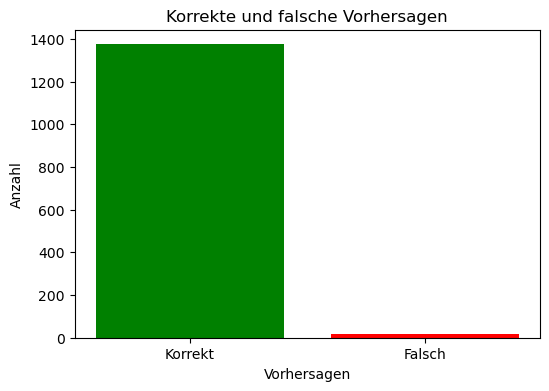

In [13]:
correct_predictions = (y_test == predictions).sum()
incorrect_predictions = len(y_test) - correct_predictions

# Visualisiere die Vorhersagen
plt.figure(figsize=(6, 4))
plt.bar(['Korrekt', 'Falsch'], [correct_predictions, incorrect_predictions], color=['green', 'red'])
plt.xlabel('Vorhersagen')
plt.ylabel('Anzahl')
plt.title('Korrekte und falsche Vorhersagen')
plt.show()

6. **Vorhersagen für neue Daten:**
   - Mache Vorhersagen für spezifische Beispielnachrichten (`msg`) und zeige die Ergebnisse an.

In [14]:
# Mache Vorhersagen für neue Daten und zeige sie an
msg = np.array(["Go until jurong point, crazy.. Available only ..."])
msg_transform = cv.transform(msg)
predictions = model.predict(msg_transform.toarray())
print(f"Diese E-Mail ist eine {predictions[0]} E-Mail.")

Diese E-Mail ist eine Nicht-Spam E-Mail.


In [15]:
msg  = np.array(["Free entry in 2 a wkly comp to win FA Cup fina...." ])
msg_transform = cv.transform(msg)
predictions = model.predict(msg_transform.toarray())
print(f"Diese E-Mail ist eine {predictions[0]} E-Mail.")

Diese E-Mail ist eine spam E-Mail.


7. **Speichern und Laden des Modells mit Pickle:**
   - Speichere das trainierte Modell (`model`) in einer Datei namens `"rs_random_forest_model_wheat_1.pkl"` mit `pickle.dump`.
   - Lade das gespeicherte Modell von der Datei `"rs_random_forest_model_wheat_1.pkl"` mit `pickle.load`.
   - Bewerte die Leistung des geladenen Modells erneut auf den Testdaten.


In [16]:
# Speichere und lade das trainierte Modell mit pickle
import pickle

# Speichere das trainierte Modell
pickle.dump(model, open("rs_random_forest_model_wheat_1.pkl", "wb"))

In [17]:
# Lade das gespeicherte Modell
loaded_pickle_model = pickle.load(open("rs_random_forest_model_wheat_1.pkl", "rb"))

# Evaluieren des geladenen Modells
loaded_pickle_model.score(X_test, y_test)

0.9863603732950467